In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from Higgs_R2.background import Background
from Higgs_R2.Potential import Potential_function
from Higgs_R2.perturbations import Perturbations

plt.style.use('style')
from pathlib import Path

Bad value in file PosixPath('/Users/flaviopineda/.matplotlib/stylelib/style.mplstyle'), line 50 ("axes.prop_cycle : cycler('color', ['#1F77B4', '#D62728', '#2CA02C', '#FF7F0E', '#7F7F7F', '#9467BD'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: EOL while scanning string literal (<unknown>, line 1)


In [2]:
# Ruta a Figures desde el notebook actual
fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
fig_dir.mkdir(parents=True, exist_ok=True)

def savefig(name, ext="pdf"):
    from pathlib import Path
    import matplotlib.pyplot as plt

    fig_dir = Path.cwd().parents[1] / "Paper" / "Figures"
    fig_dir.mkdir(parents=True, exist_ok=True)
    path = fig_dir / f"{name}.{ext}"
    plt.savefig(path, bbox_inches="tight", dpi=300)
    print(f"✅ Figura guardada en {path}")

In [3]:
V = 'exp(-sqrt(8/3)*phi)*(lambda_h*h**4/4 + (1/(16*xi_s))*(exp(sqrt(2/3)*phi) - 1 - xi*h**2)**2)'
parameters = {'lambda_h': 1e-10, 'xi': 1e-1, 'xi_s': 4e8}
potential = Potential_function.from_string(V, param_values=parameters)

In [4]:
#Extrayendo datos de la clase background
bg = Background(potential, phi0 = 5.7, lambda_h= 1e-10, xi = 1e-1, xi_s = 4e8)

In [5]:
vars = ['N', 'phi', 'dphidN', 'h', 'dhdN', 'H', 'a', 'aH', 'eps_H', 'dotsigma', 'eta_perp', 'eta_sigma',  'm_iso']
N, phi, dphidN, h, dhdN, H, a, aH, eps_H, dotsigma, eta_perp, eta_sigma,  m_iso = (bg.data(save=True)[i] for i in vars)
Nend = bg.N_end
Nend

84.18418418418419

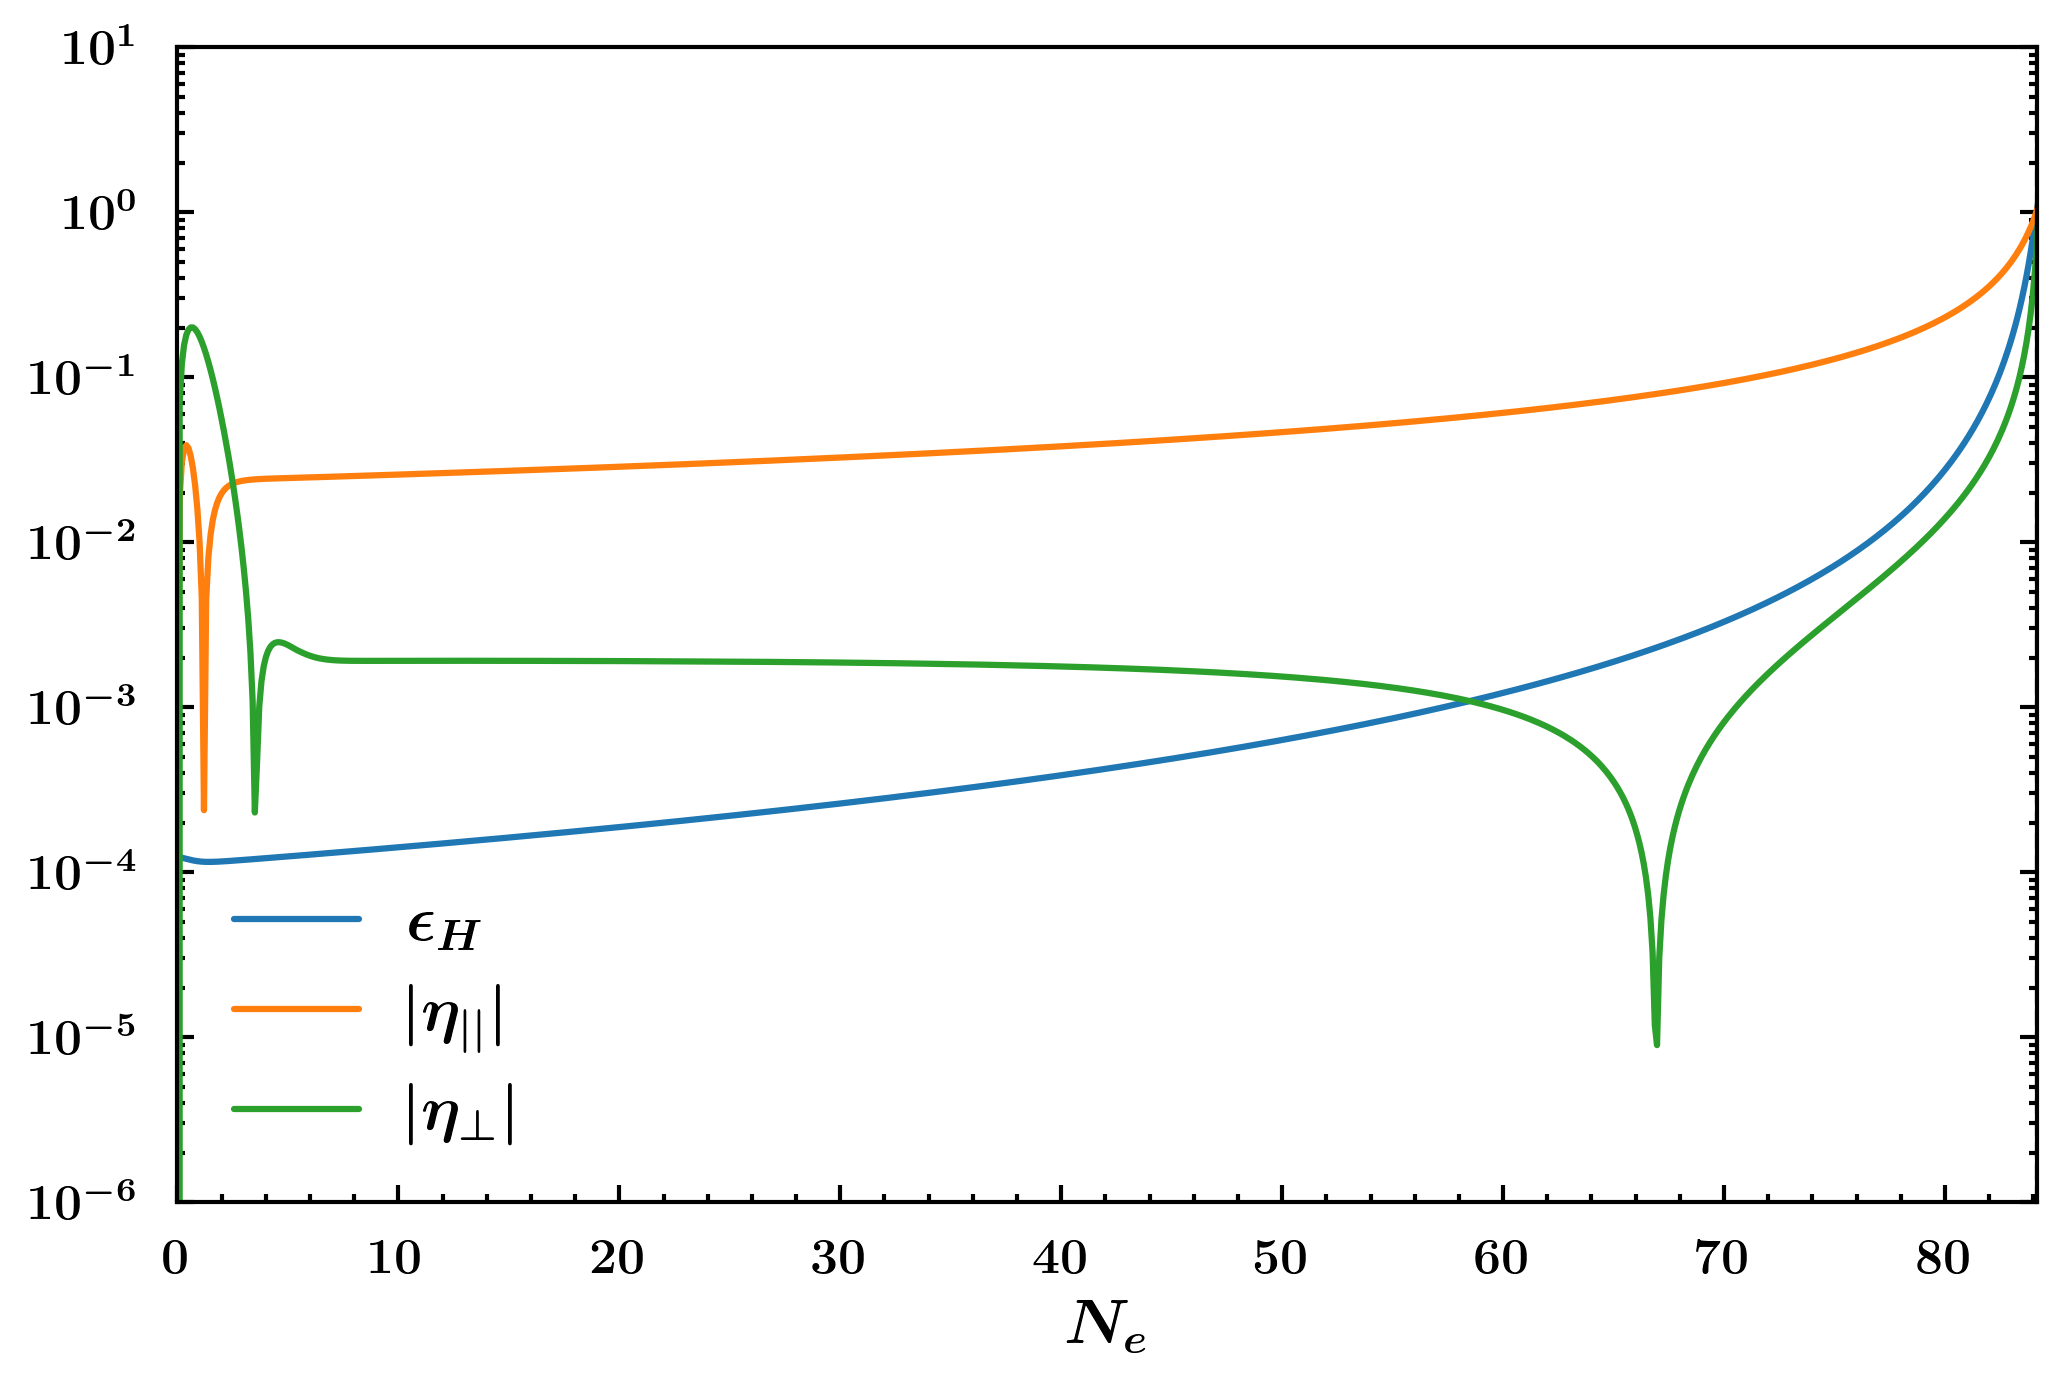

In [6]:
plt.semilogy(N, eps_H, label = r"$\epsilon_H$")
plt.semilogy(N, abs(eta_sigma), label = r"$|\eta_{||}|$")
plt.semilogy(N, abs(eta_perp), label = r"$|\eta_\perp|$")
plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'k')
plt.xlabel(r"$N_e$")

plt.xlim(0, Nend)
plt.ylim(1e-6, 1e1)
plt.legend()


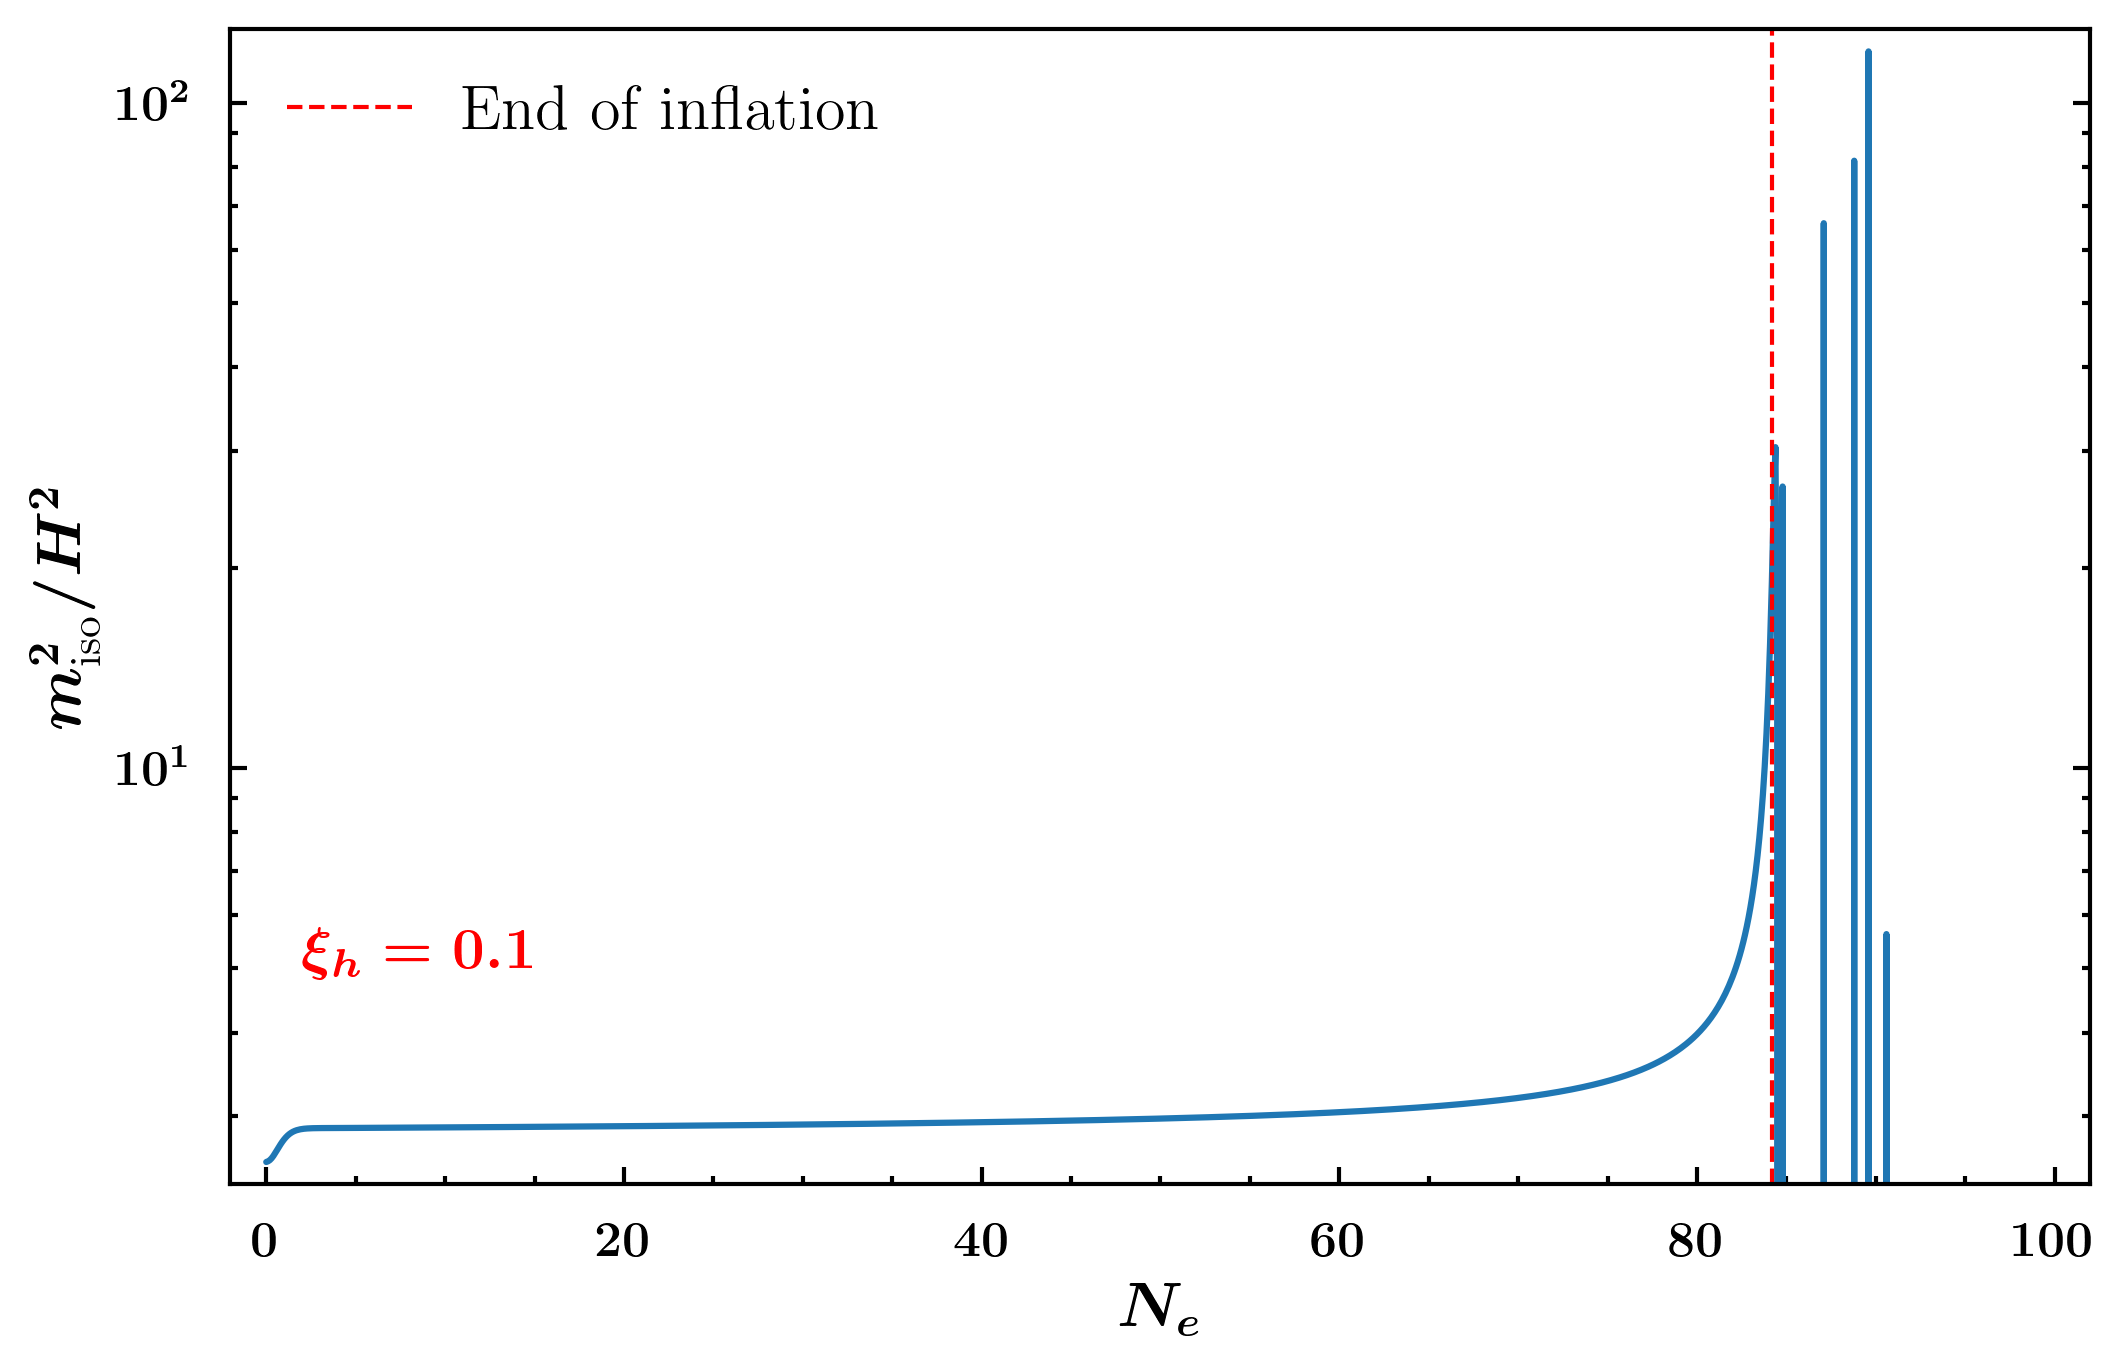

In [7]:
plt.semilogy(N, m_iso/H**2)
plt.axvline(Nend, linestyle = 'dashed', linewidth= 1, color = 'r', label = 'End of inflation')
plt.text(2, 5, r"$\xi_h = 0.1$", fontsize=14, color='red')

plt.xlabel(r"$N_e$")
plt.ylabel(r"$m_\text{iso}^2/H^2$")
plt.legend()
#savefig('isomass1')

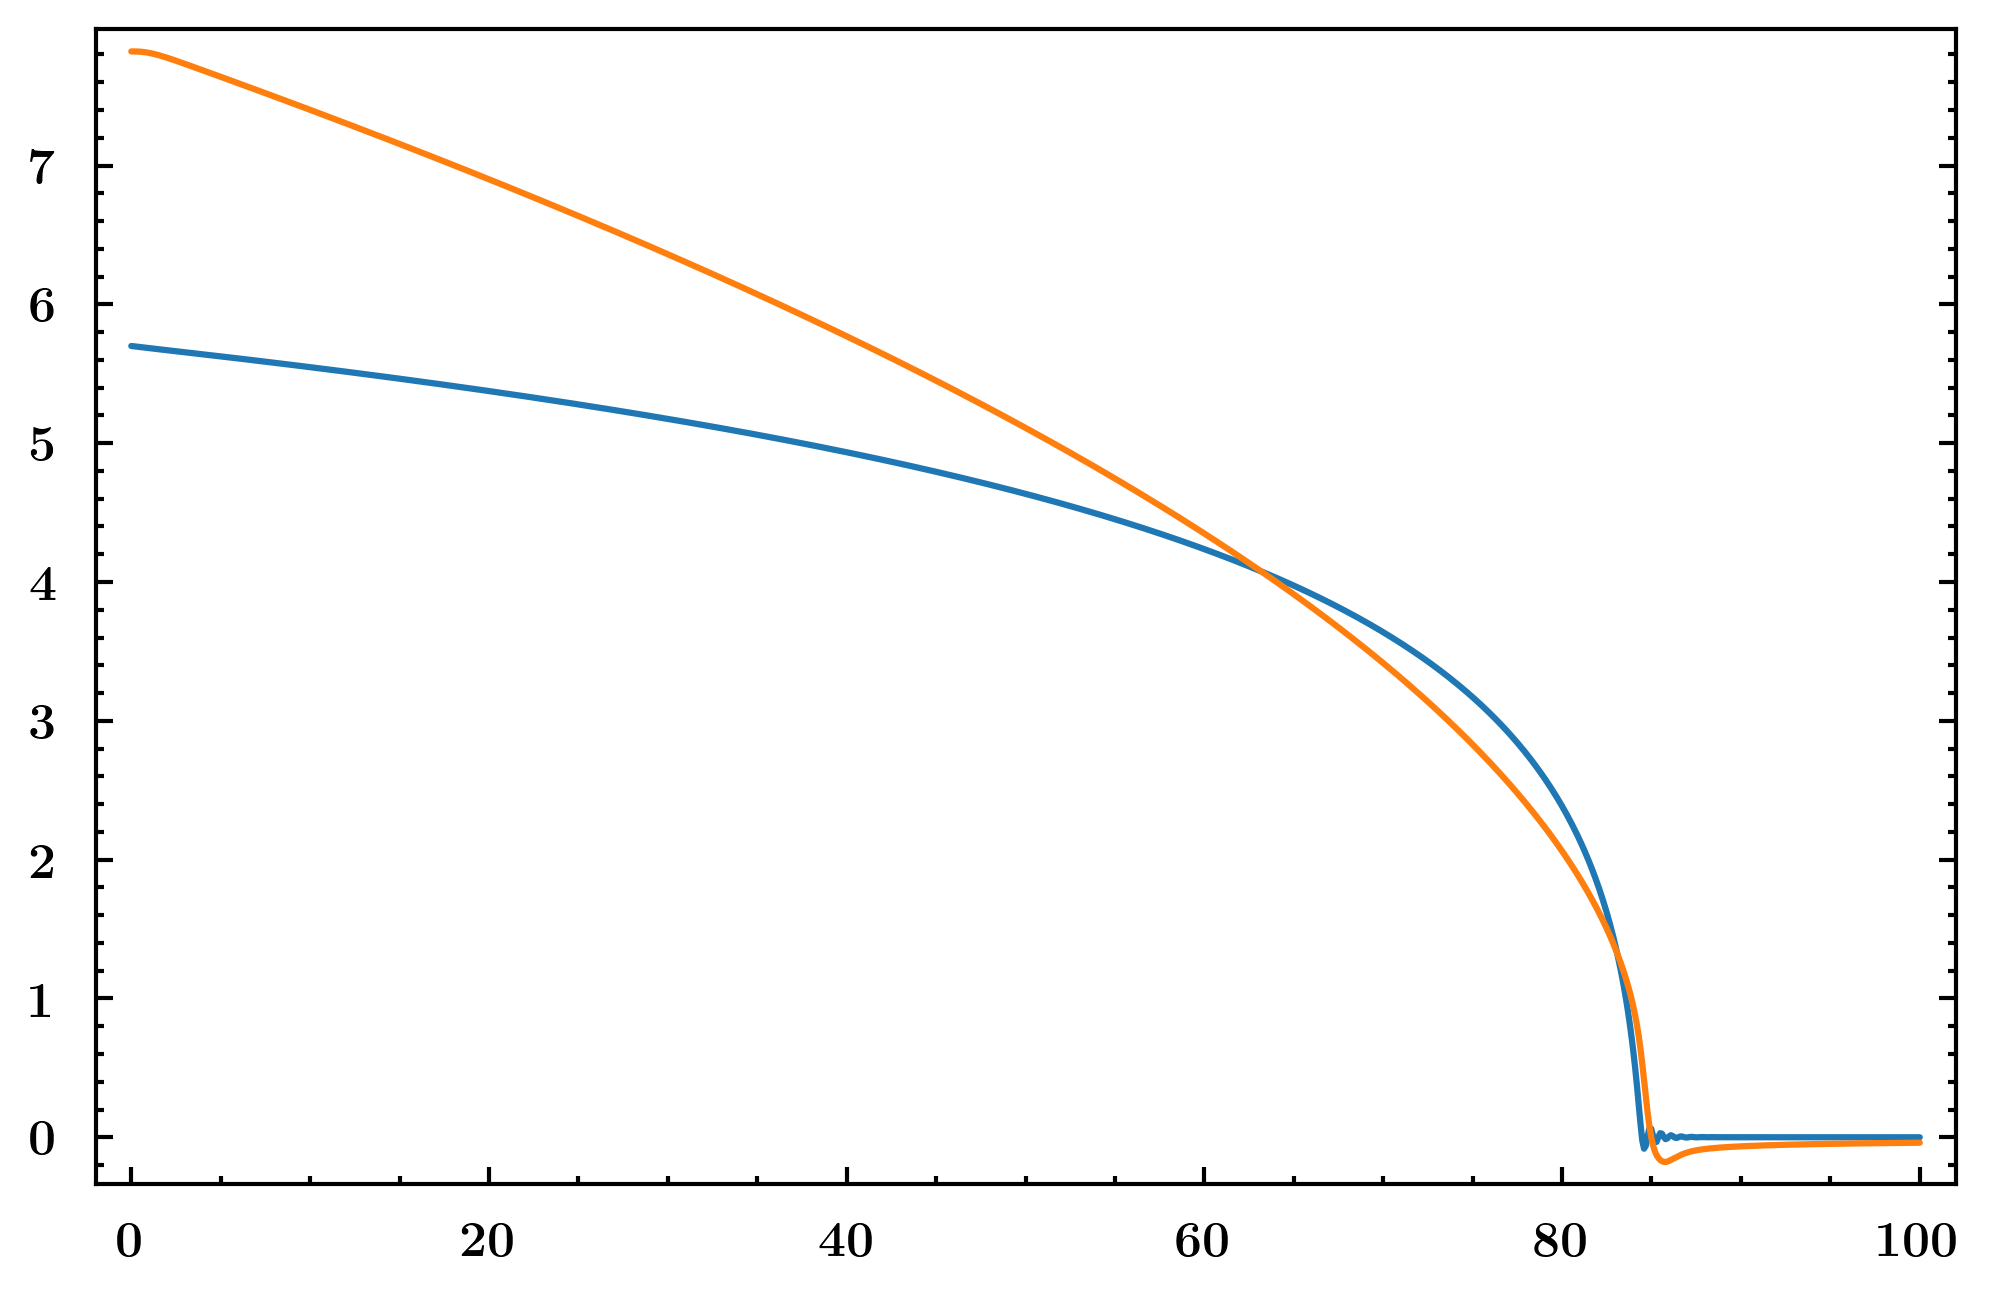

In [8]:
plt.plot(N, phi)
plt.plot(N, h)


In [21]:
pert = Perturbations(potential, bg, N_CMB = 54.37)
k_pivot = pert.k_CMB
Npivot = pert.N_hc(k = k_pivot)
print(f'El modo {k_pivot} cruza el horizonte a {Npivot[0]} e-folds')
sol = pert.solver()

El modo 0.05 cruza el horizonte a 29.814184184184192 e-folds


In [22]:
variables = ['N', 'R_re', 'dRdN_re','R_im', 'dRdN_im', 
                'Q_re', 'dQdN_re', 'Q_im', 'dQdN_im', 'h_re', 'dhdN_re', 'h_im', 'dhdN_im', 'P_R', 'P_S', 'P_t', 'P_R_end', 'P_S_end', 'P_t_end', 'r_end']
N, R_re, dRdN_re, R_im, dRdN_im, Q_re, dQdN_re, Q_im, dQdN_im, h_re, dhdN_re, h_im, dhdN_im, P_R, P_S, P_t, P_R_end, P_S_end, P_t_end, r_end = (pert.data[i] for i in variables)


In [23]:
P_R_end, P_S_end, P_t_end, r_end

(2.350609394898263e-09,
 array([2.44151455e-40, 2.43873572e-40, 2.43595845e-40, 2.43318588e-40,
        2.43041130e-40, 2.42763901e-40, 2.42487141e-40, 2.42210114e-40,
        2.41933384e-40, 2.41657123e-40, 2.41380523e-40, 2.41104287e-40,
        2.40828521e-40, 2.40552345e-40, 2.40276602e-40, 2.40001298e-40,
        2.39725580e-40, 2.39450333e-40, 2.39175456e-40, 2.38900239e-40,
        2.38625492e-40, 2.38351048e-40, 2.38076331e-40, 2.37802084e-40,
        2.37528070e-40, 2.37253845e-40, 2.36980090e-40, 2.36706495e-40,
        2.36432755e-40, 2.36159484e-40, 2.35886311e-40, 2.35613068e-40,
        2.35340296e-40, 2.35067553e-40, 2.34794809e-40, 2.34522536e-40,
        2.34250221e-40, 2.33977972e-40, 2.33706193e-40, 2.33434303e-40,
        2.33162547e-40, 2.32891260e-40, 2.32619797e-40, 2.32348536e-40,
        2.32077746e-40, 2.31806714e-40, 2.31535954e-40, 2.31265664e-40,
        2.30995064e-40, 2.30724804e-40, 2.30455014e-40, 2.30184838e-40,
        2.29915069e-40, 2.29645764e-40, 

In [24]:
pert.compute_beta_iso_at_freeze(0.002)


{'P_R': 1.504391462101561e-13,
 'P_S': nan,
 'P_RS': nan,
 'beta_iso': 7.55156518790205e-10,
 'cosDelta': nan,
 'diag': {'N_hc': 26.594078919112537,
  'N_freeze': 36.75907891911254,
  'rel_dR_at_freeze': 9.907490327144495e-07,
  'absR': 0.019266388215827338,
  'absQs': 1.3754750008333422e-08,
  'is_negligible': True}}

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/powerspectrum_efolds4.pdf


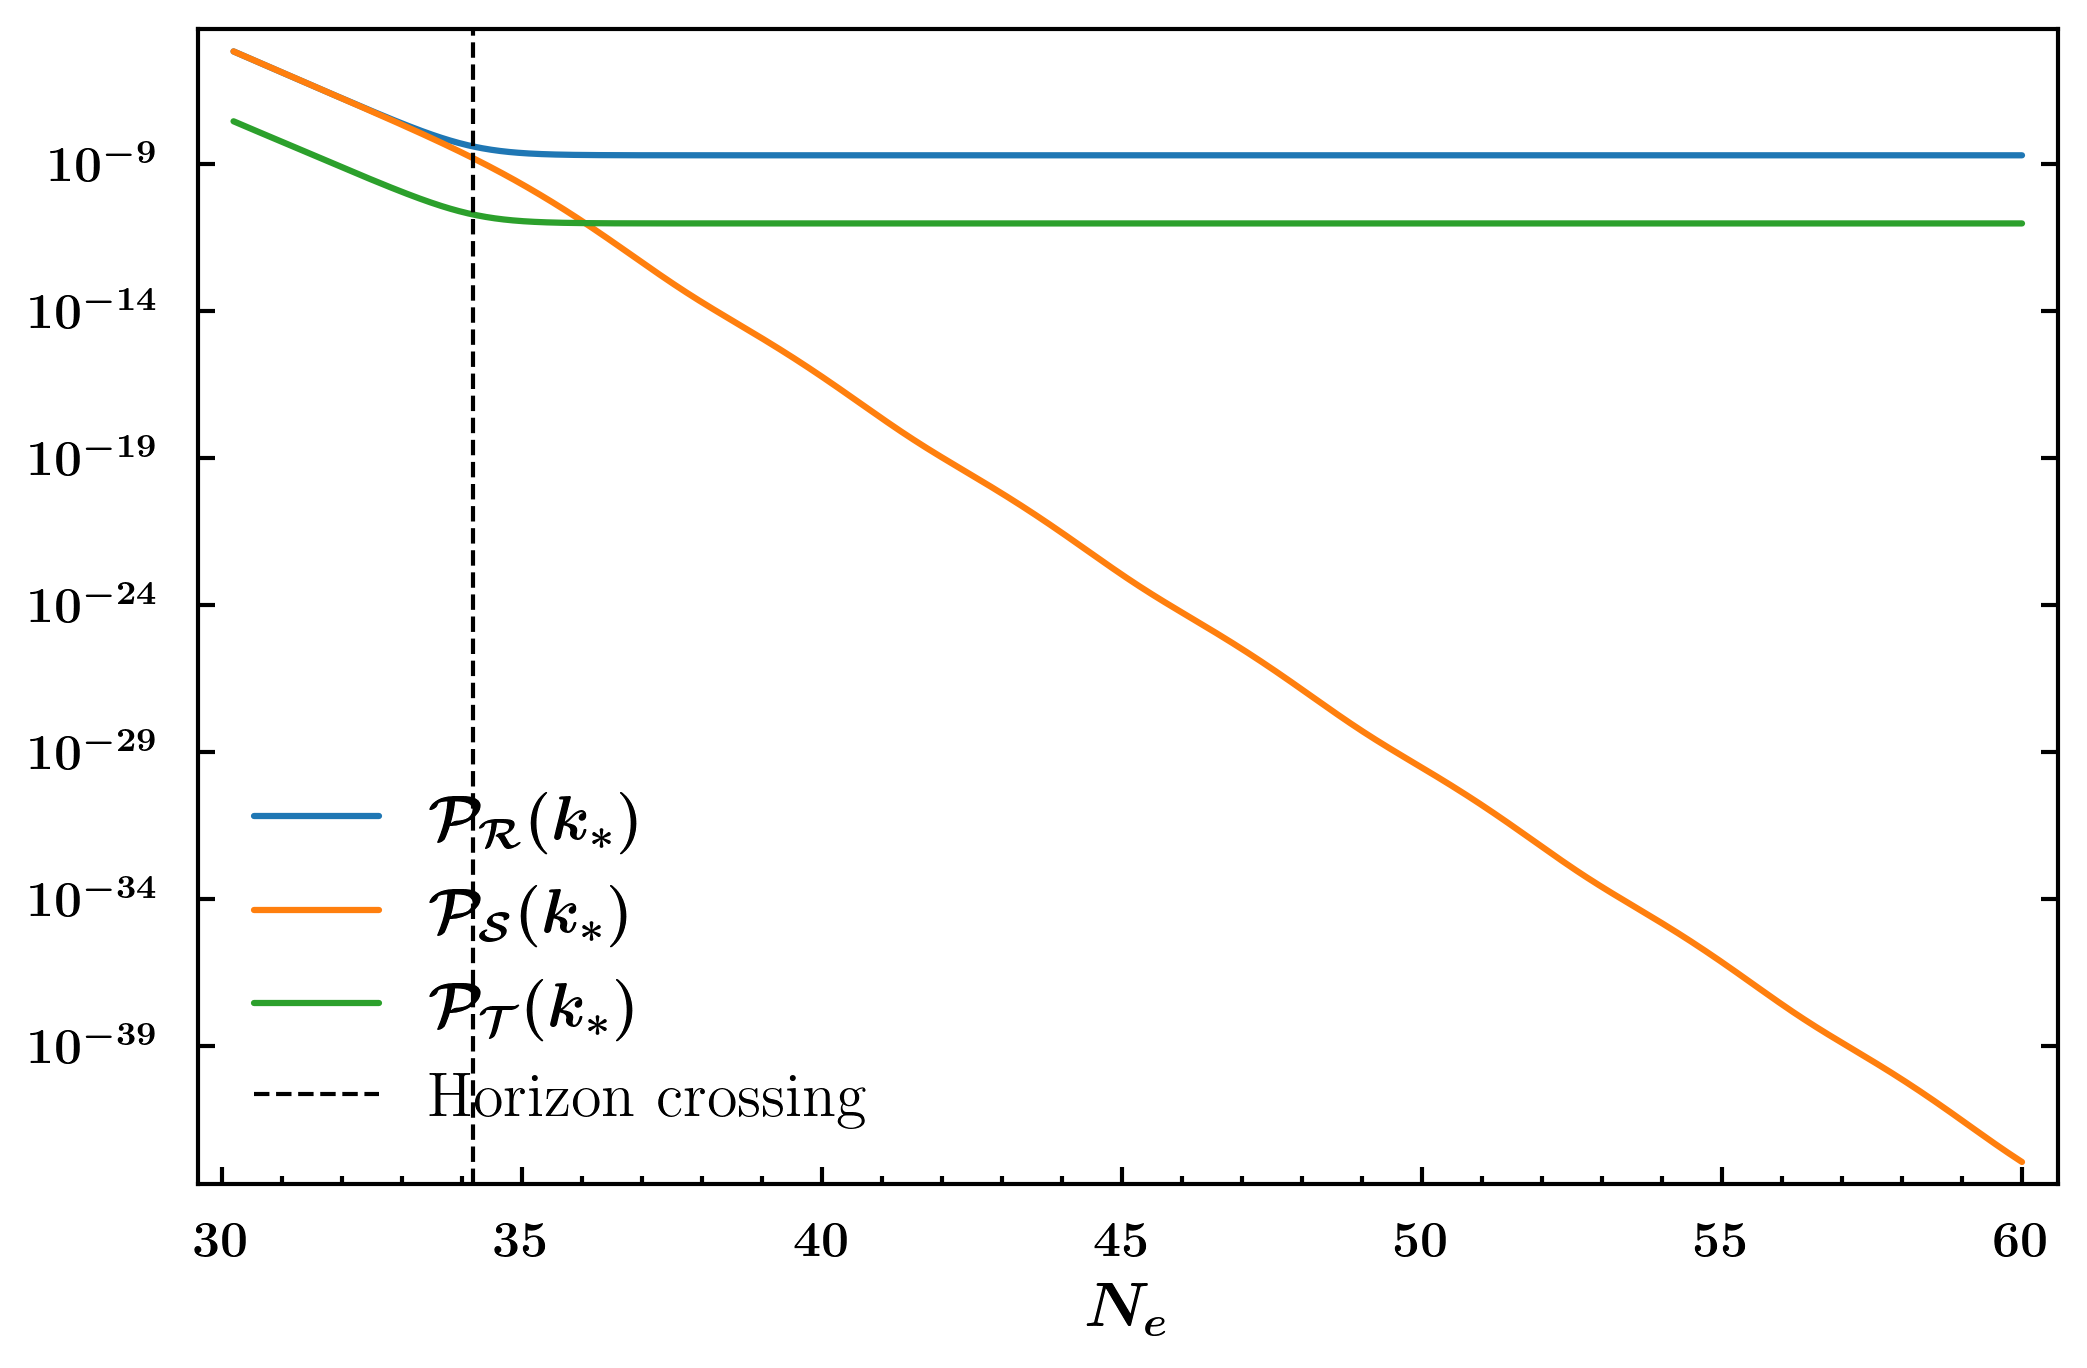

In [13]:
plt.semilogy(N, P_R, label = r"$\mathcal{P}_\mathcal{R}(k_*)$")
plt.semilogy(N, P_S, label = r"$\mathcal{P}_\mathcal{S}(k_*)$")
plt.semilogy(N, P_t, label = r"$\mathcal{P}_\mathcal{T}(k_*)$")
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')


plt.xlabel(r"$N_e$")
#plt.xlim(pert.N_ini(k_pivot), 45)
plt.legend()
savefig('powerspectrum_efolds4')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/adiabaticmode4.pdf


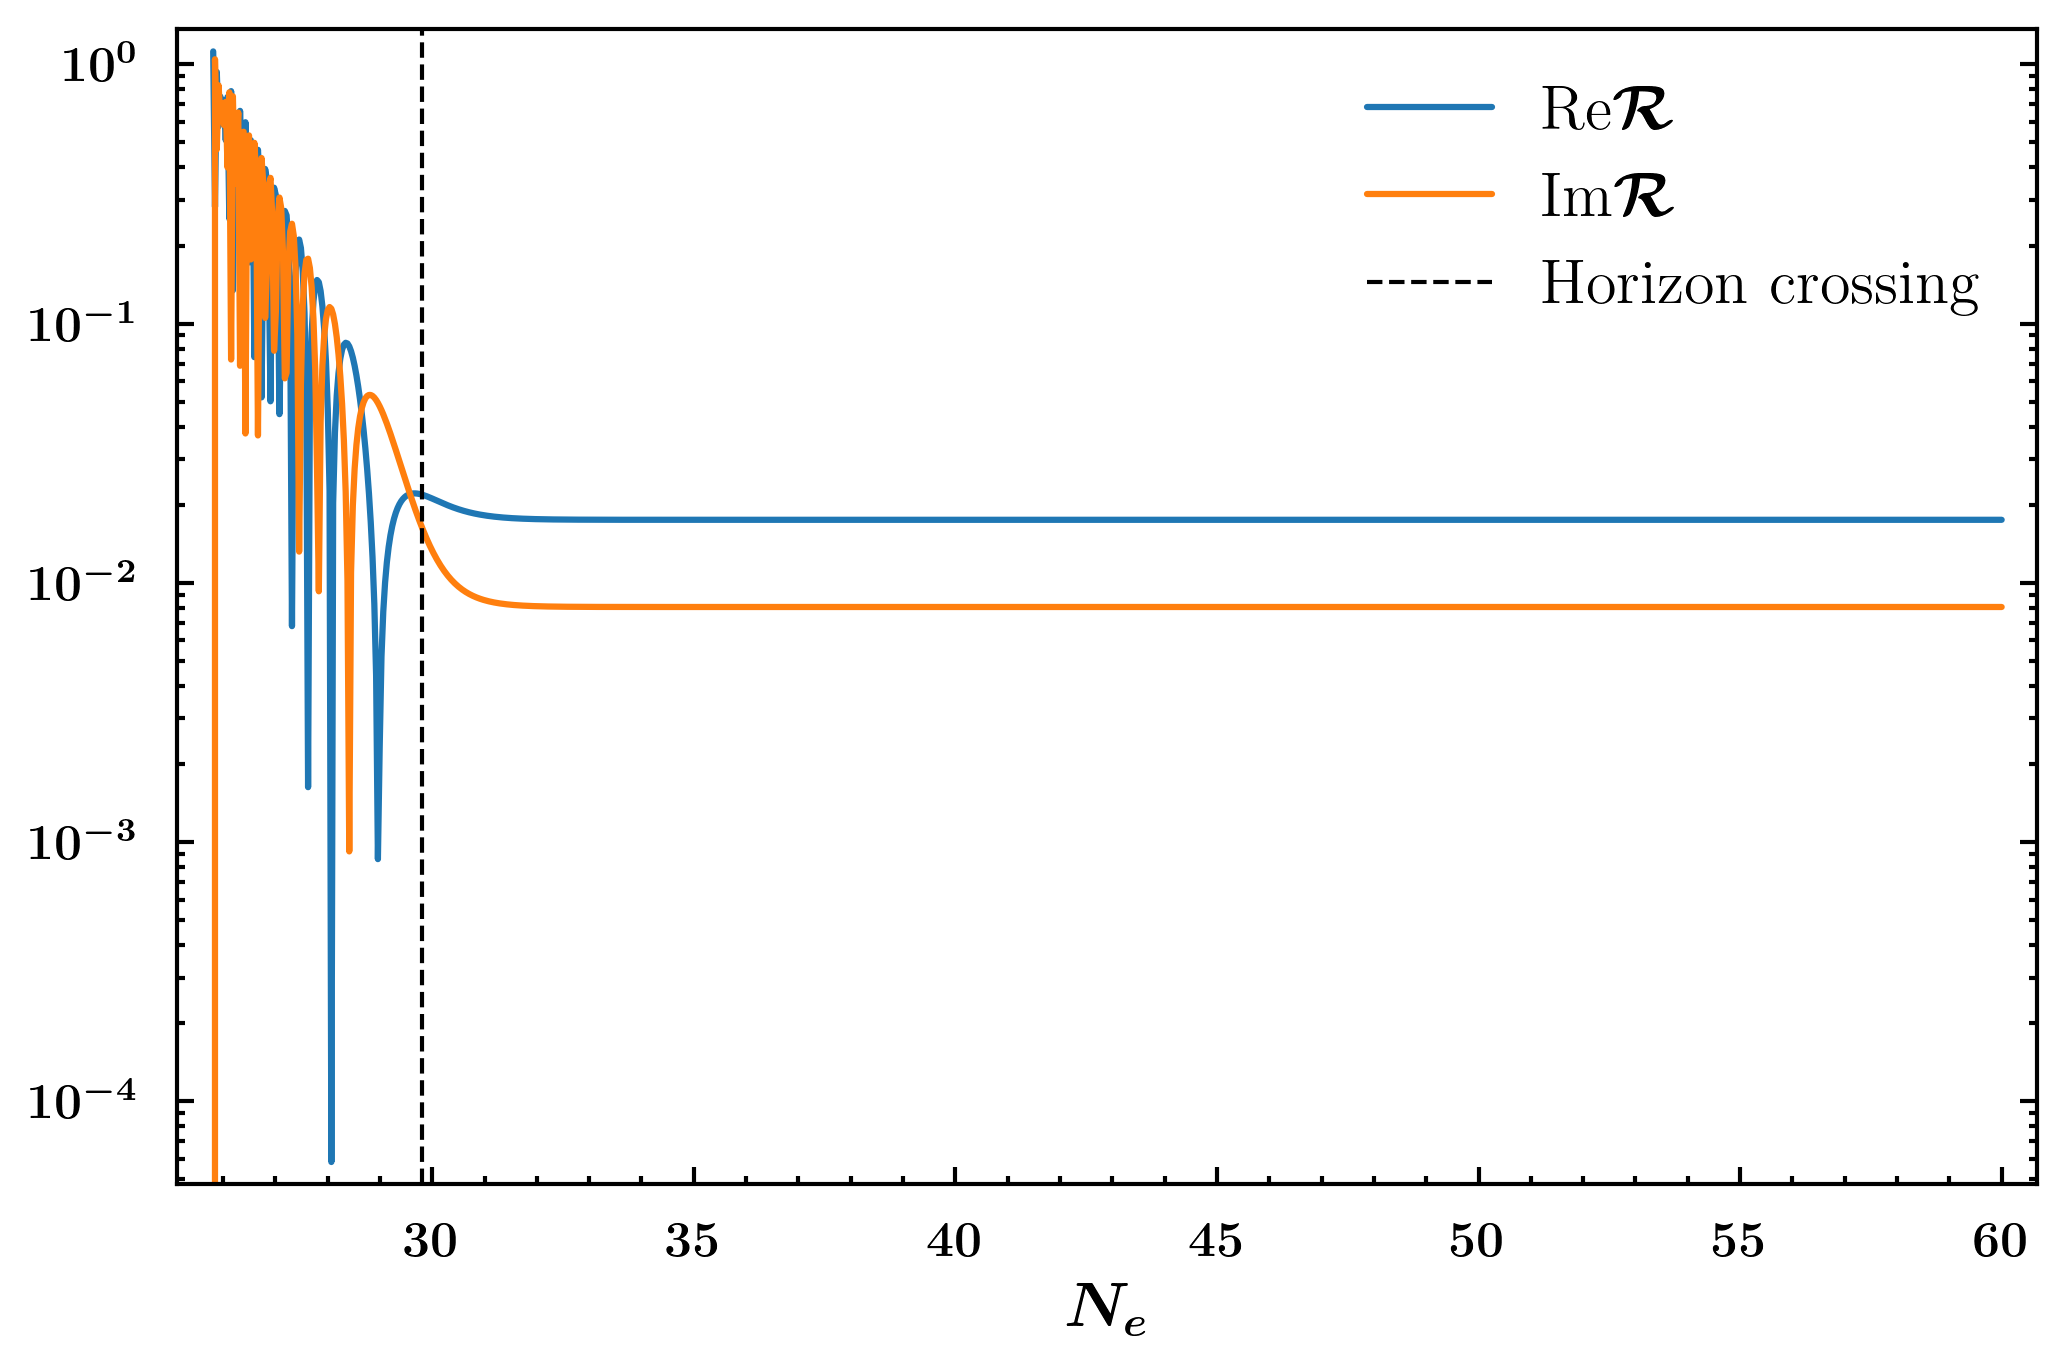

In [25]:
plt.semilogy(N, abs(R_re), label = r'$\text{Re}\mathcal{R}$')
plt.semilogy(N, abs(R_im), label = r'$\text{Im}\mathcal{R}$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')

plt.xlabel(r"$N_e$")
plt.legend()
savefig('adiabaticmode4')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/isomode4.pdf


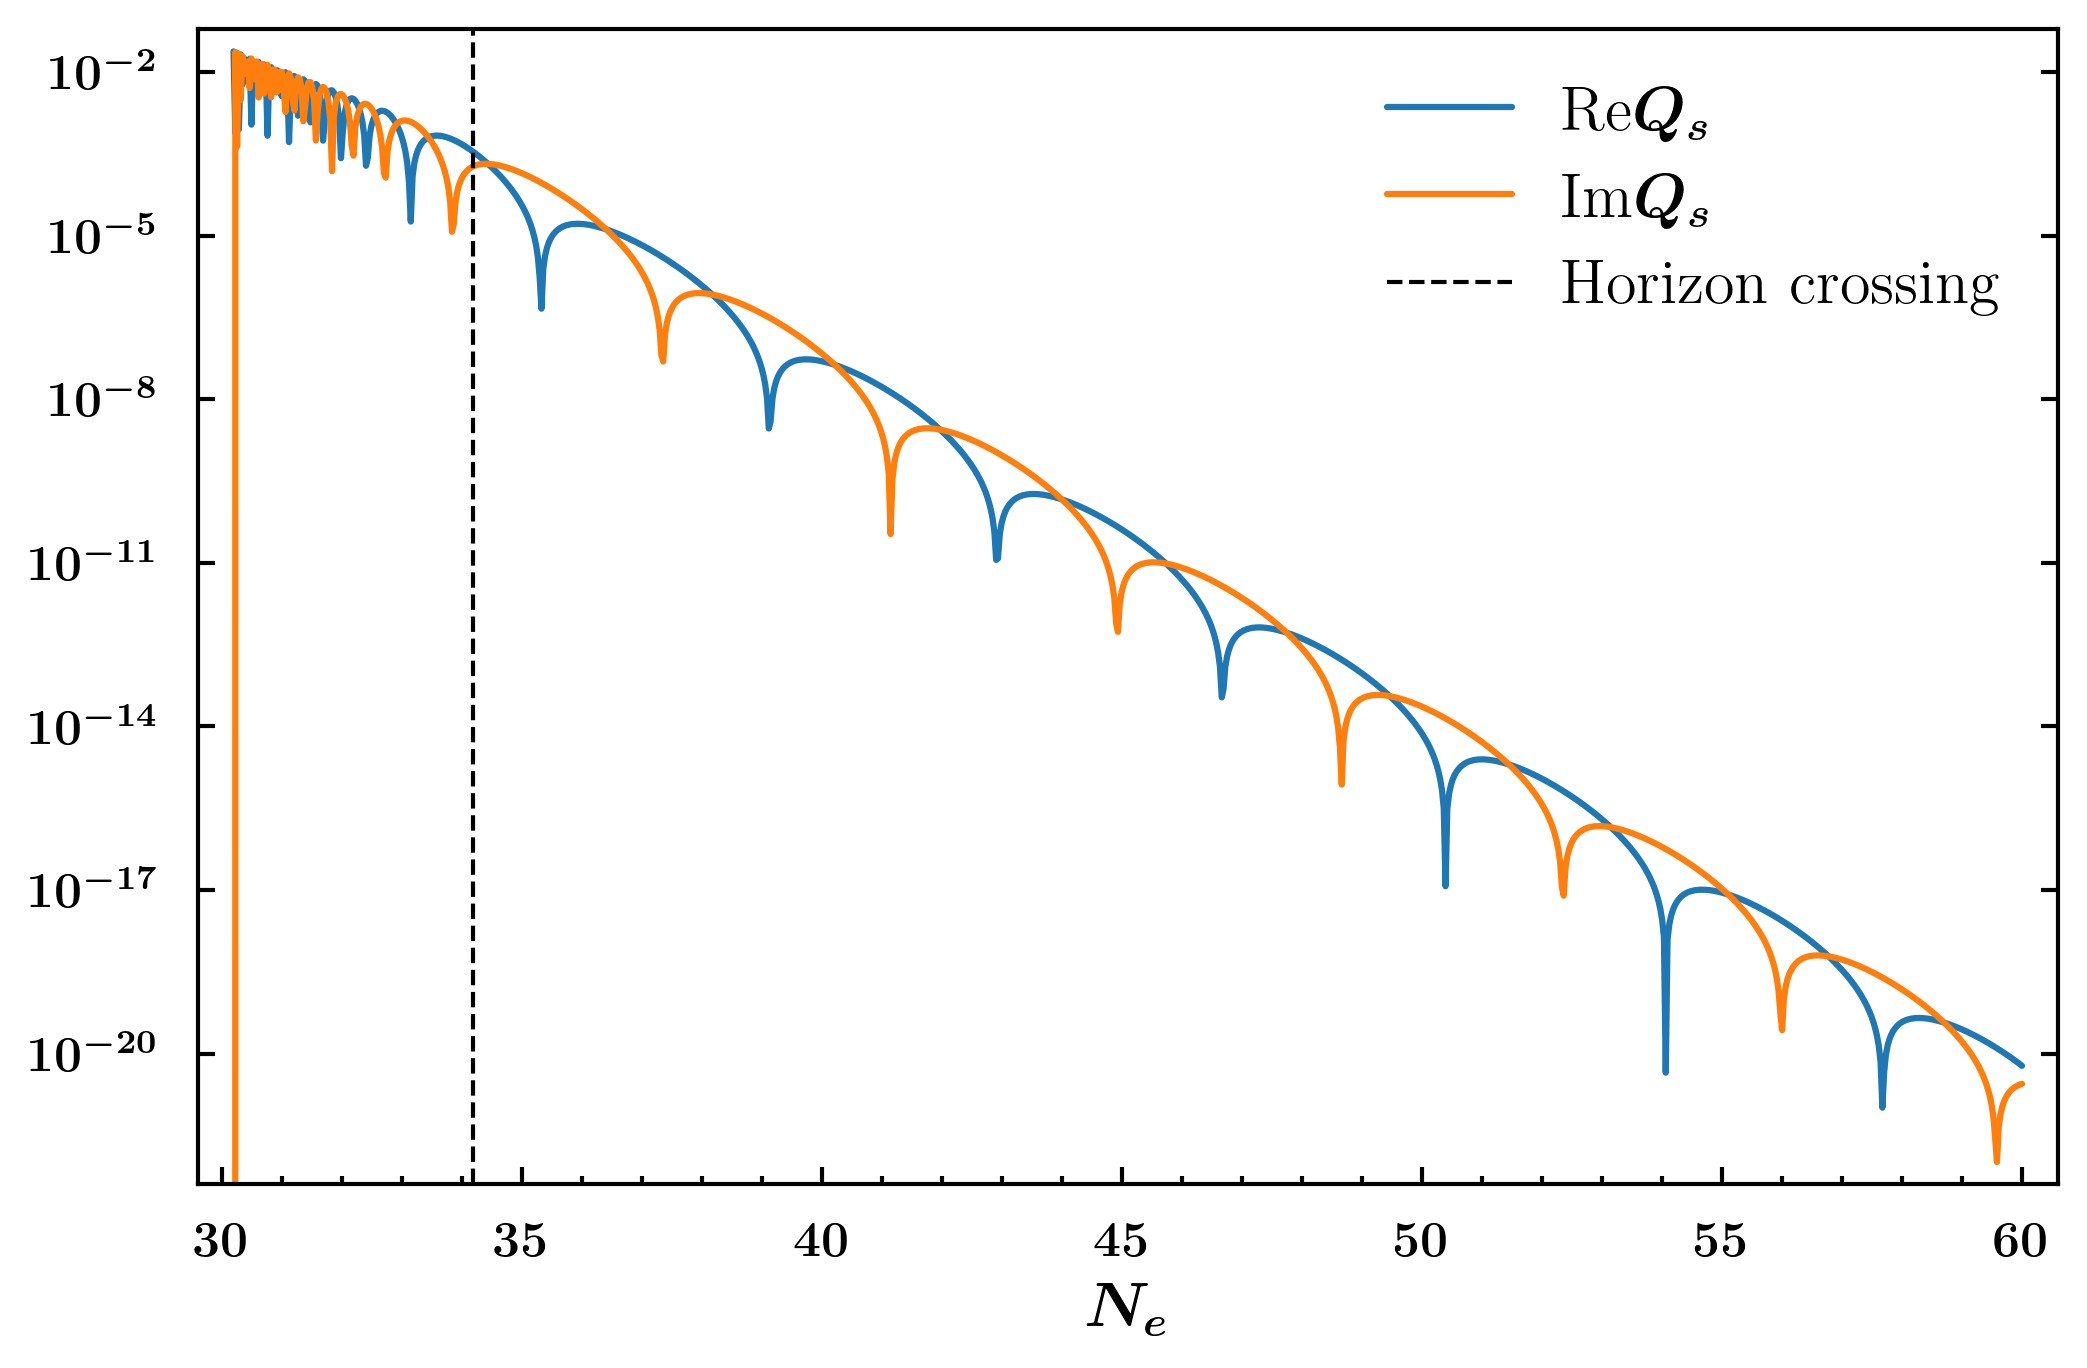

In [15]:
plt.semilogy(N, abs(Q_re), label = r'$\text{Re}Q_s$')
plt.semilogy(N, abs(Q_im), label = r'$\text{Im}Q_s$')
plt.axvline(Npivot[0], linewidth = 1, linestyle = 'dashed', color = 'k', label = 'Horizon crossing')

plt.xlabel(r"$N_e$")
plt.legend()
savefig('isomode4')

In [ ]:
ps = pert.Power_spectrum_end(save = True)   

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/PS_adiabatic4.pdf


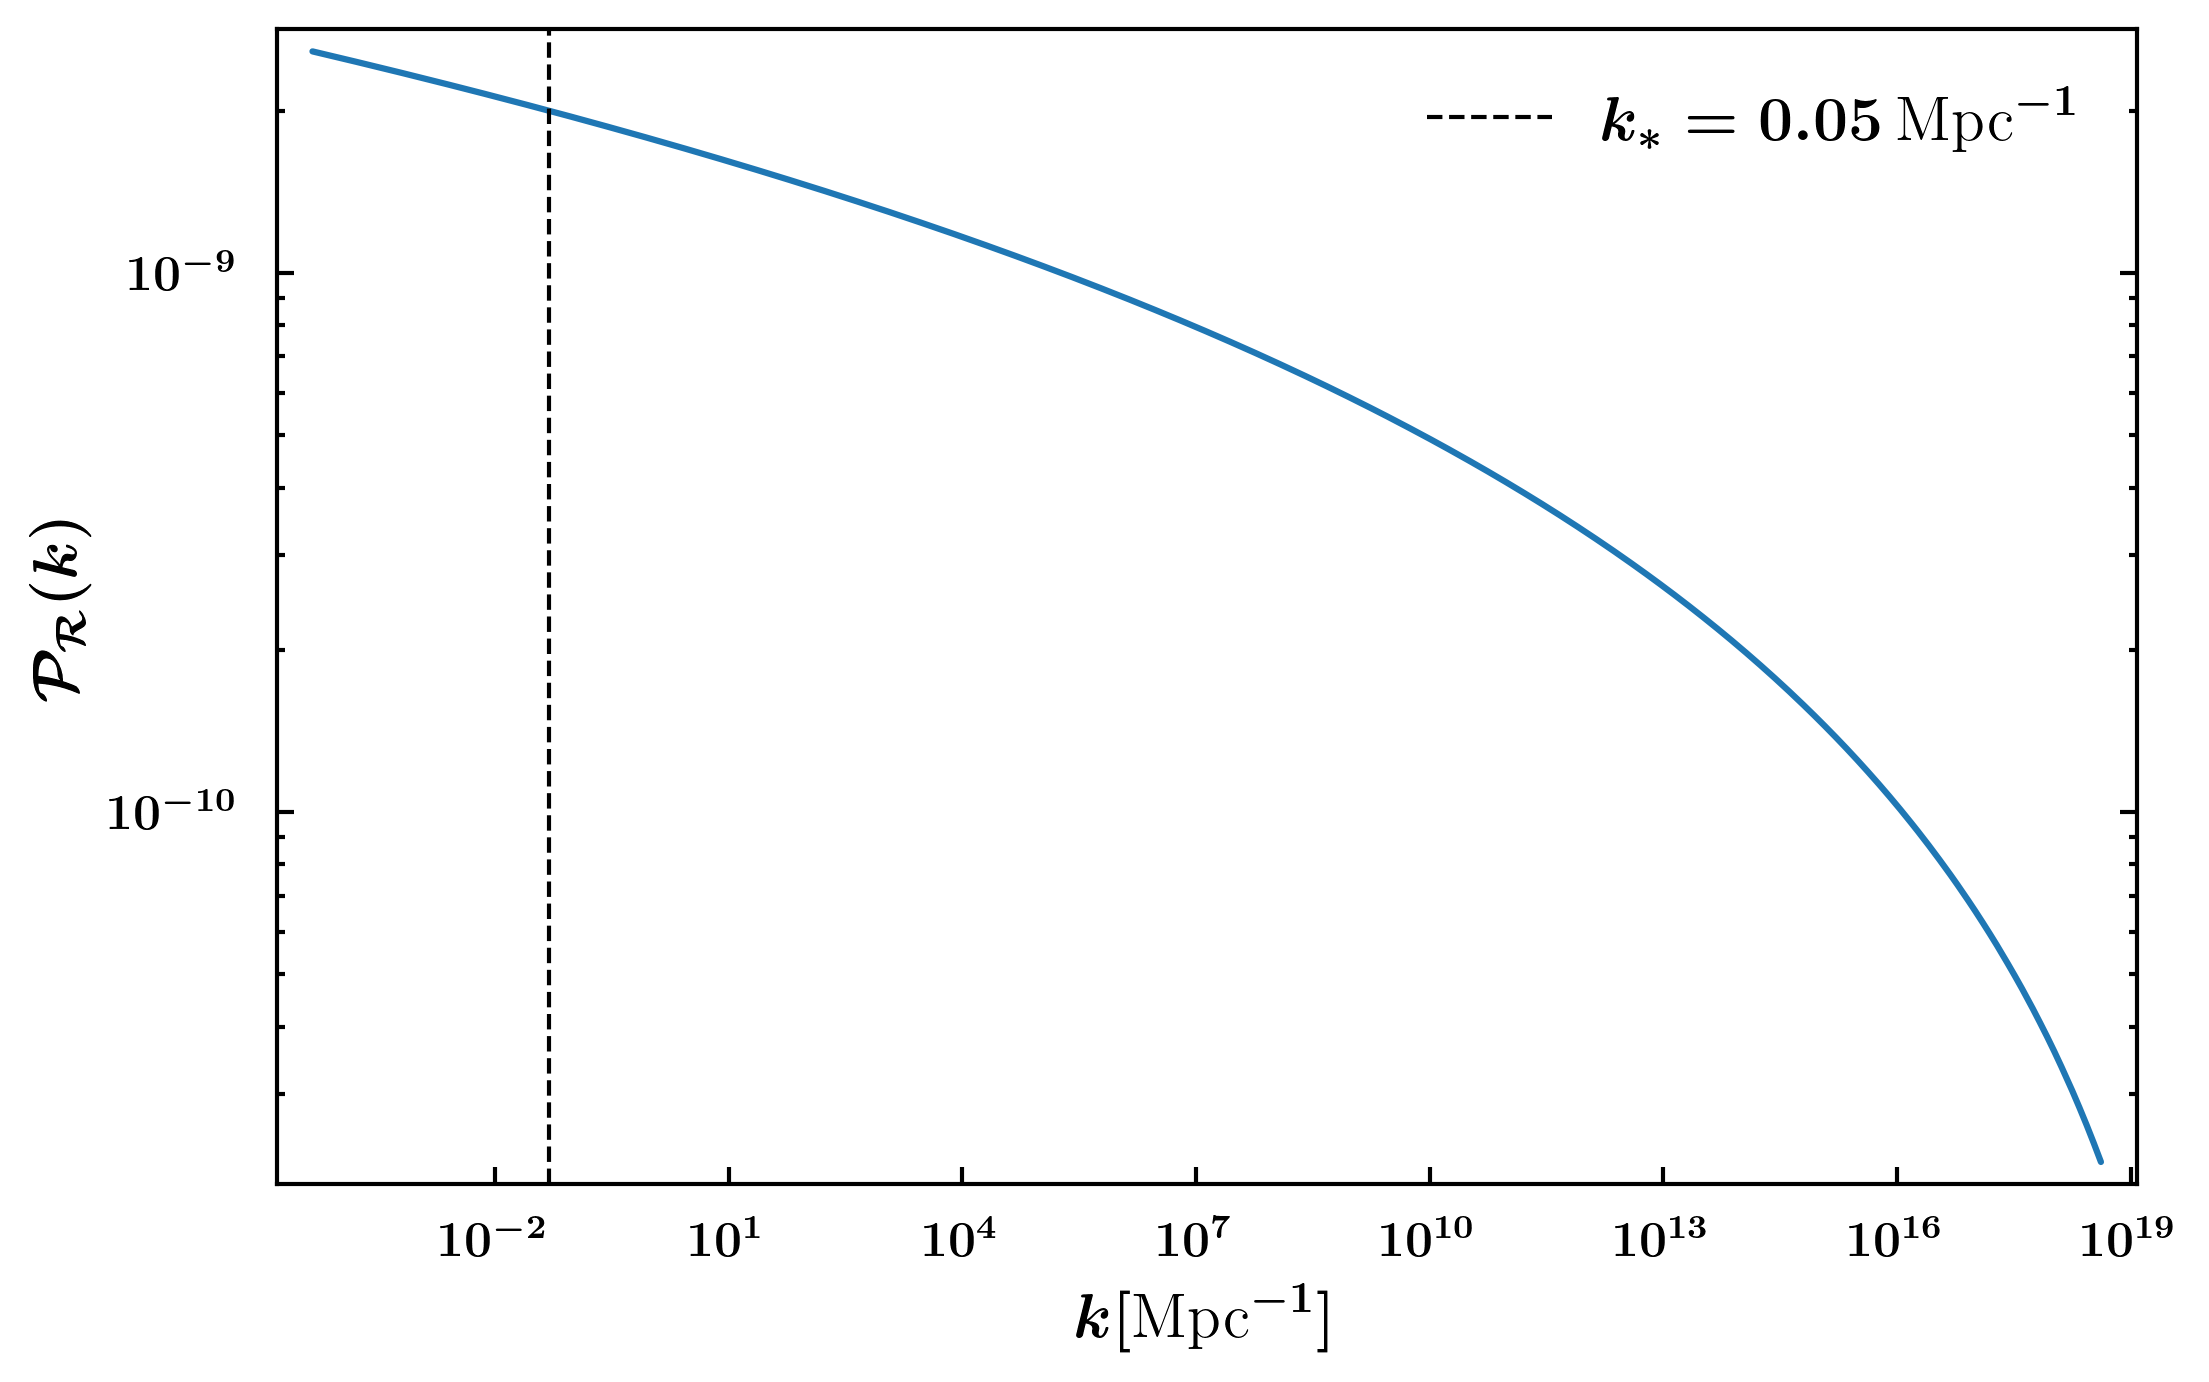

In [17]:
plt.loglog(pert.k_modes, ps[0])

plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}_\mathcal{R}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")

plt.legend()
savefig('PS_adiabatic4')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/PS_iso4.pdf


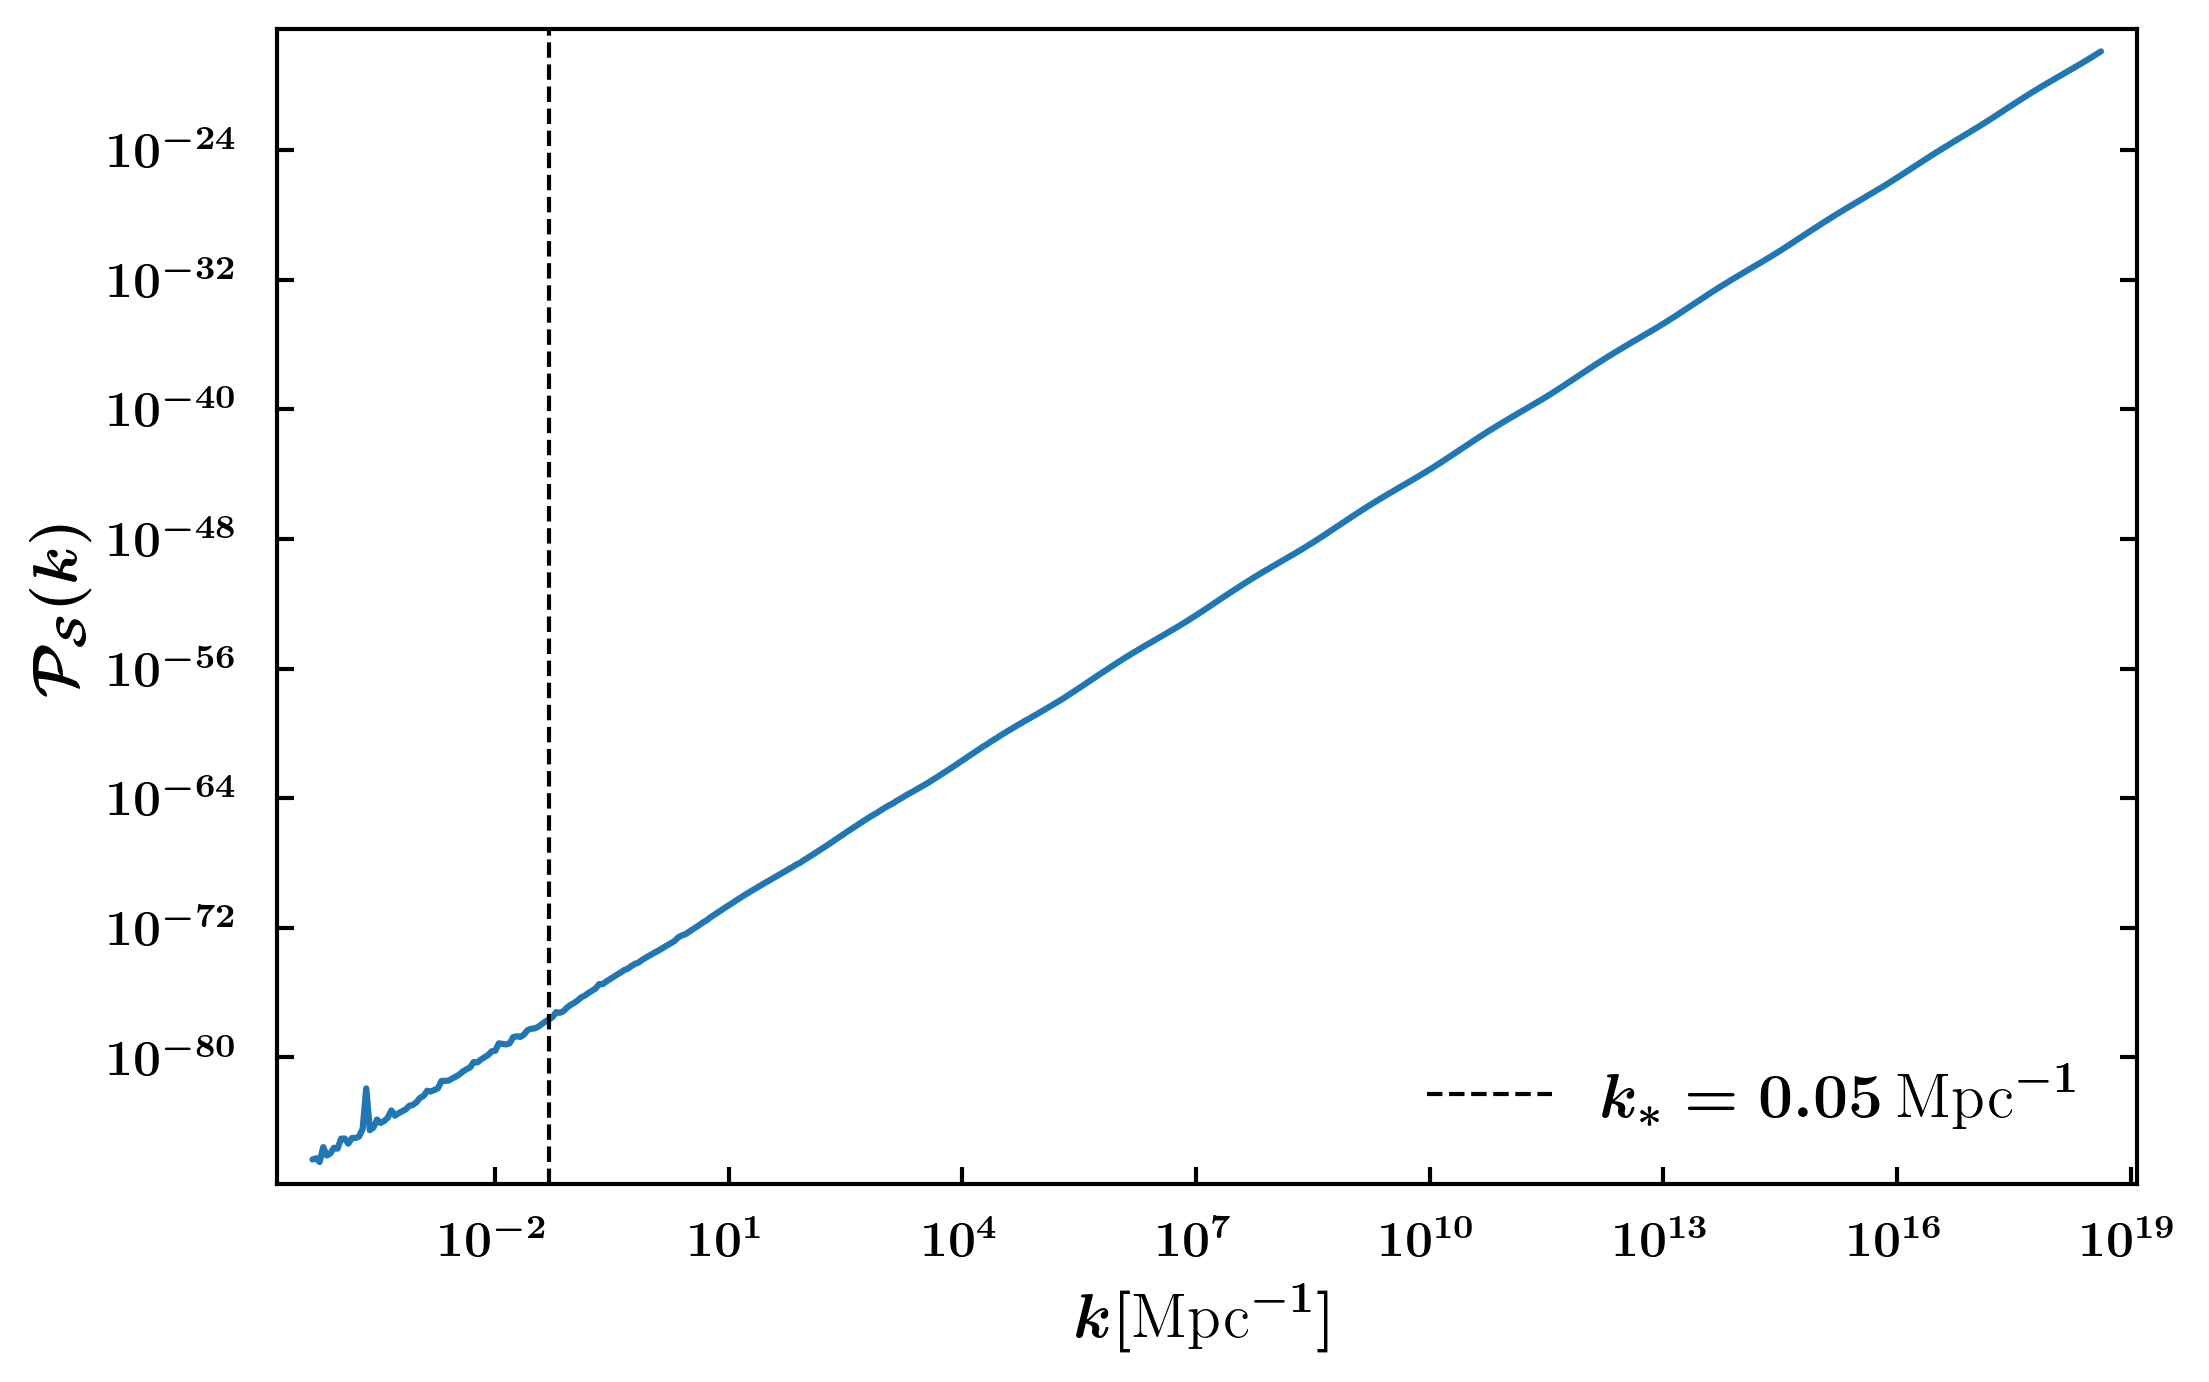

In [18]:
plt.loglog(pert.k_modes, ps[1])
plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$\mathcal{P}_\mathcal{S}(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")
# plt.ylim(1e-80, 1e-55)
# plt.xlim(1e-4,1e7)
plt.legend()
savefig('PS_iso4')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/tensor_to_scalar_ratio4.pdf


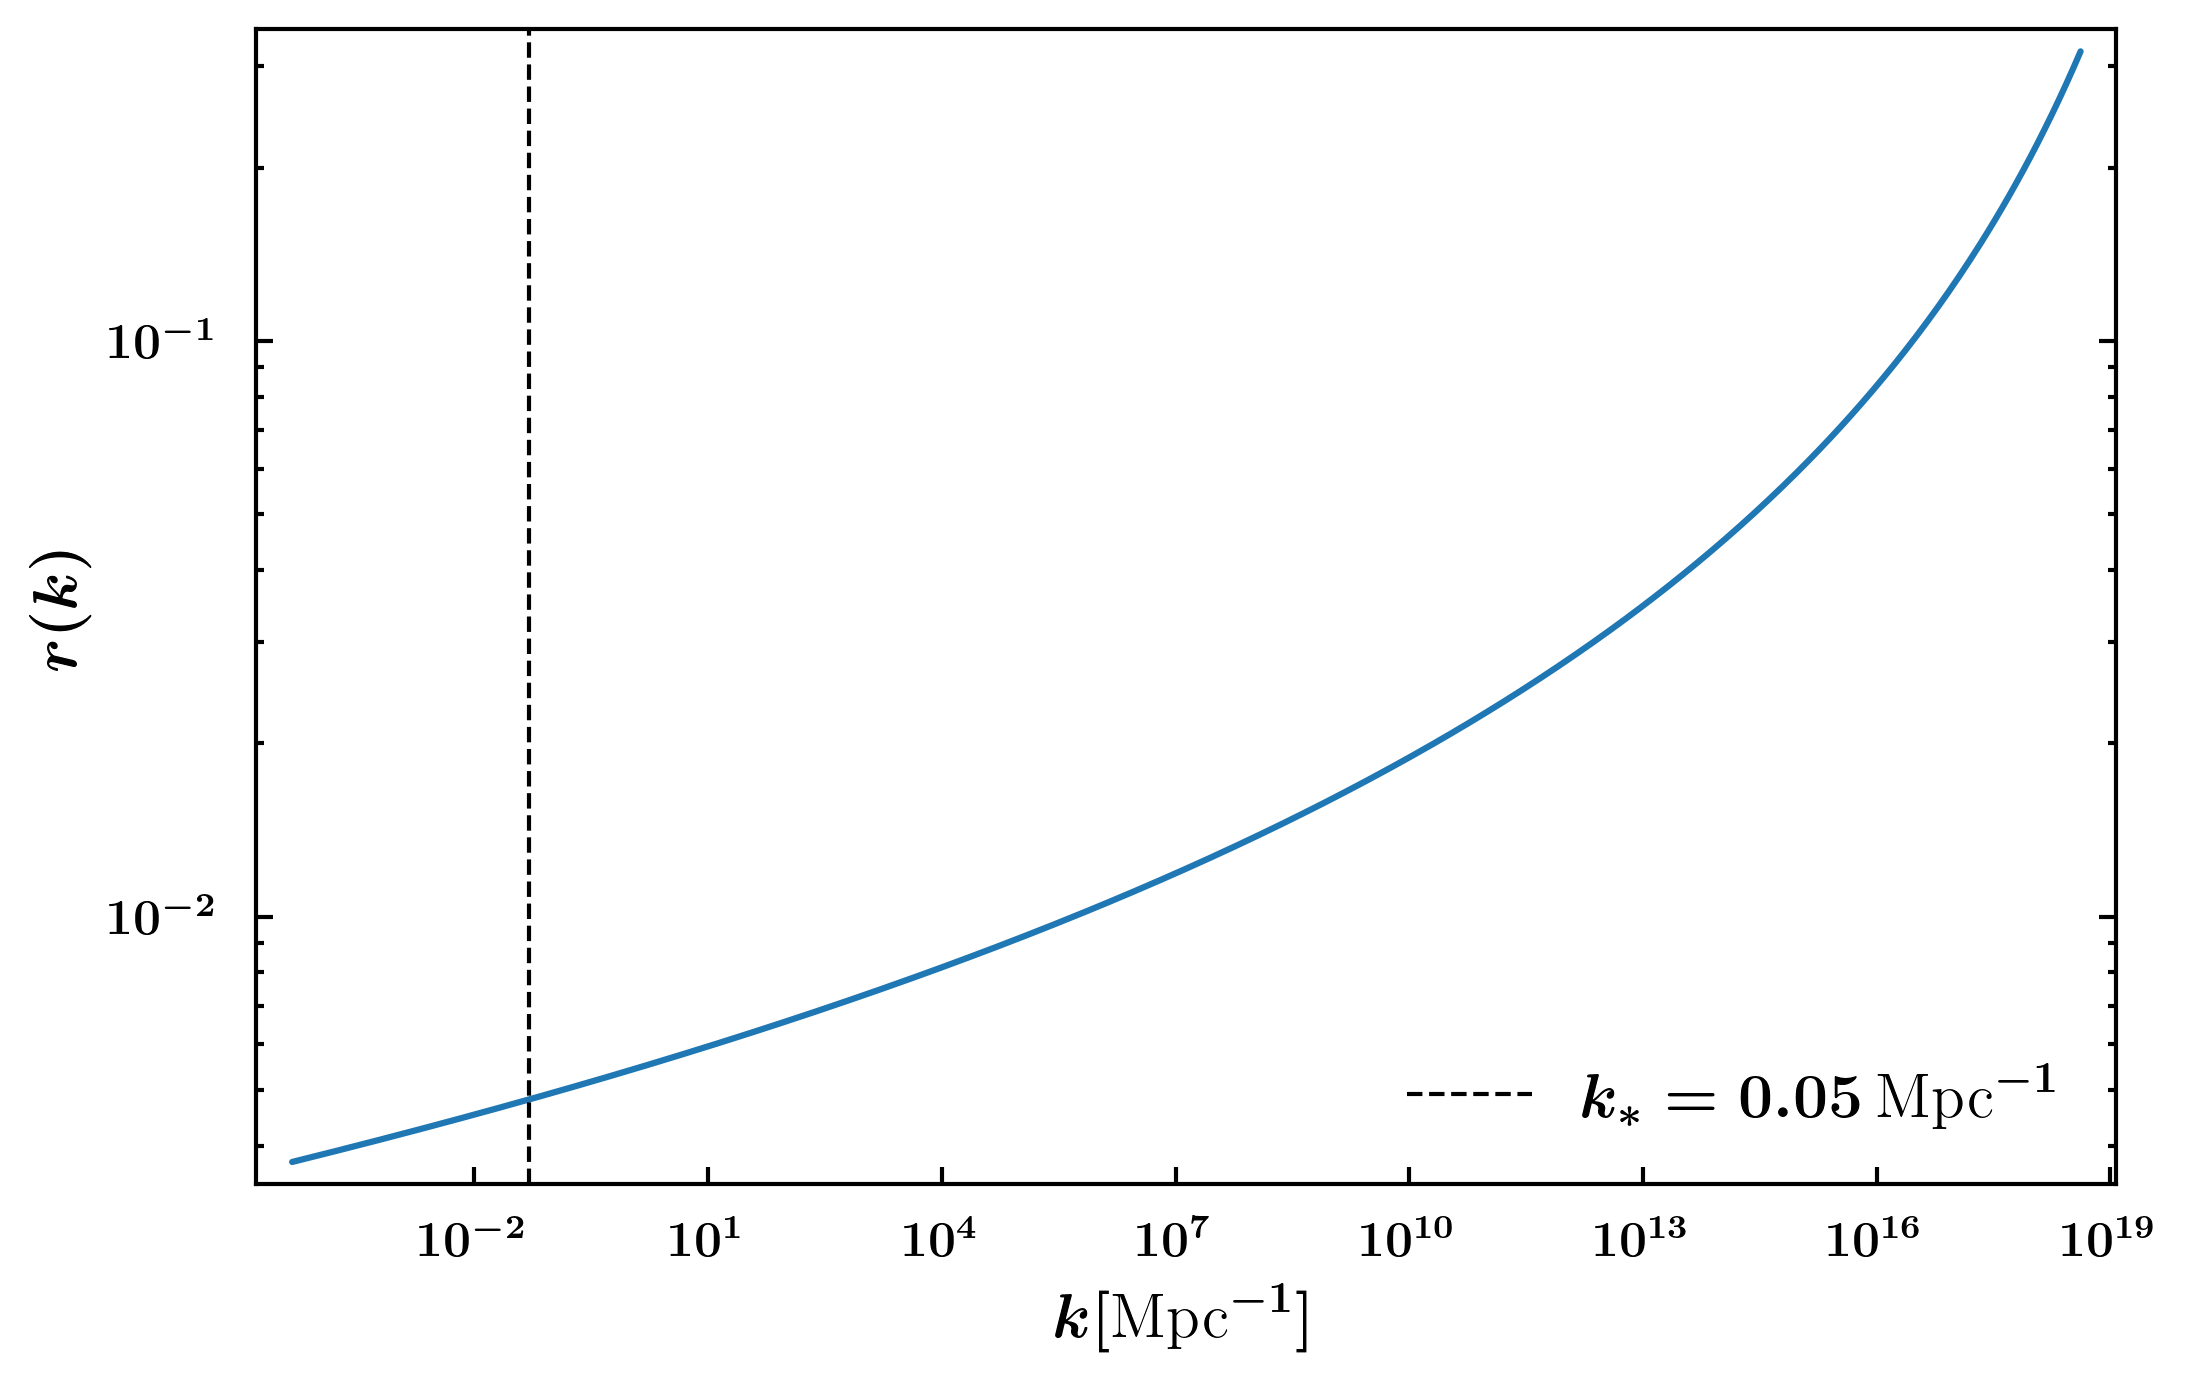

In [19]:
plt.loglog(pert.k_modes, ps[3]/ps[0])
plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$r(k)$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")
plt.legend()
savefig('tensor_to_scalar_ratio4')

✅ Figura guardada en /Users/flaviopineda/Documents/Fisica/Proyectos/Generating isocurvature modes and primordial features in multi-field Higgs-R^2 inflation/Paper/Figures/PS_cross4.pdf


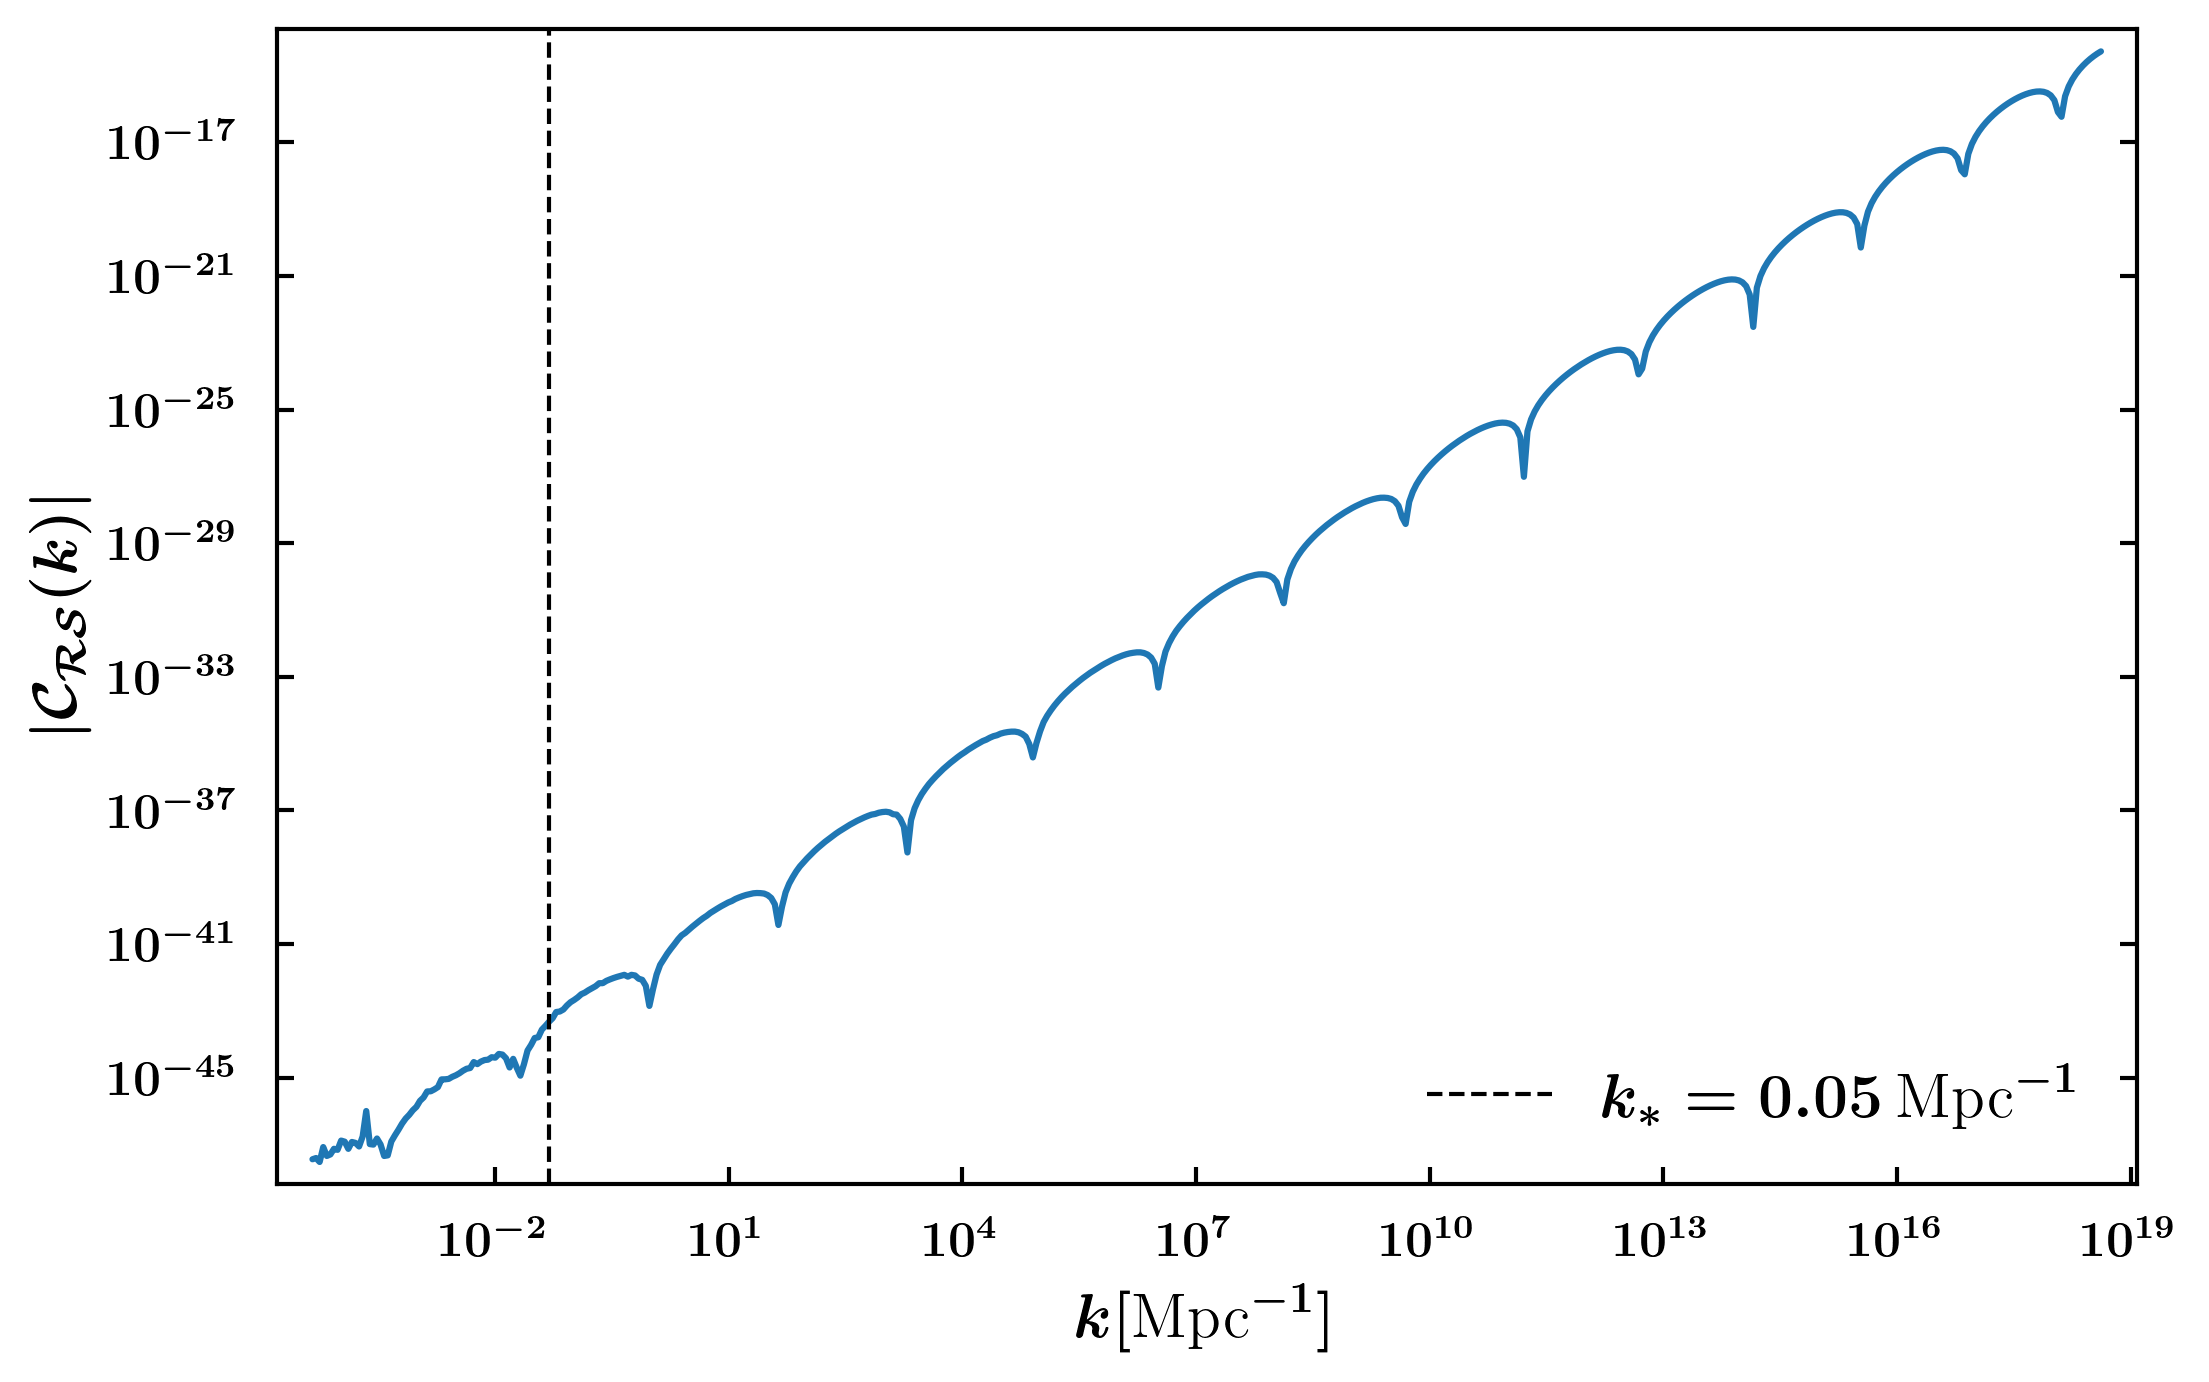

In [20]:
plt.loglog(pert.k_modes, np.abs(ps[2]))
plt.axvline(pert.k_CMB, linewidth = 1, linestyle = 'dashed', color = 'k', label = r"$k_* = 0.05\,\text{Mpc}^{-1}$")

plt.ylabel(r"$|\mathcal{C}_\mathcal{RS}(k)|$")
plt.xlabel(r"$k[\text{Mpc}^{-1}]$")
# plt.ylim(1e-45, 1e-34)
# plt.xlim(1e-4,1e7)
plt.legend()
savefig('PS_cross4')